In [66]:
import generate_playlist as gp
import pandas as pd
import warnings
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
pd.options.mode.chained_assignment = None 

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [67]:
song_df = gp.load_song_db()
artists_df = gp.load_artist_db()

In [68]:
song_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,song
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,Carve_['Uli']
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,Capítulo 2.16 - Banquero Anarquista_['Fernando...
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,Vivo para Quererte - Remasterizado_['Ignacio C...
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,El Prisionero - Remasterizado_['Ignacio Corsini']
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,Lady of the Evening_['Dick Haymes']


In [69]:
artists_df.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,,Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,,ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,,Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,,Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,,Ioannis Panoutsopoulos,0


## PCA

In [70]:
features_list =  ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']

subset_artists = ['Halsey', 'Florence \+ The Machine', 'Rise Against', 'Shawn Mendes',
               'Bring Me The Horizon',  'Ludovico Einaudi', 'Apache 207', 'Hollywood Undead',
                 'Grimes']
df = song_df[song_df["artists"].str.contains('|'.join(subset_artists))]
condition = [df["artists"].str.contains('Halsey', na=False), df["artists"].str.contains('Florence \+ The Machine', na=False), 
             df["artists"].str.contains('Rise Against', na=False), df["artists"].str.contains('Shawn Mendes', na=False),
            df["artists"].str.contains('Bring Me The Horizon', na=False), df["artists"].str.contains('Ludovico Einaudi', na=False),
           df["artists"].str.contains('Apache 207', na=False), df["artists"].str.contains('Hollywood Undead', na=False),
           df["artists"].str.contains('Grimes', na=False)]
values = subset_artists
df["group"] = np.select(condition, values, default = np.nan)

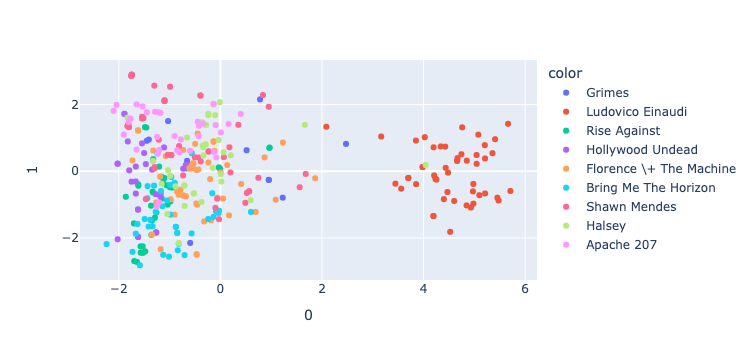

In [71]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])
components = pipeline.fit_transform(df[features_list])
fig = px.scatter(components, x=0, y=1, color=df["group"], hover_name = df["song"])
fig.show()

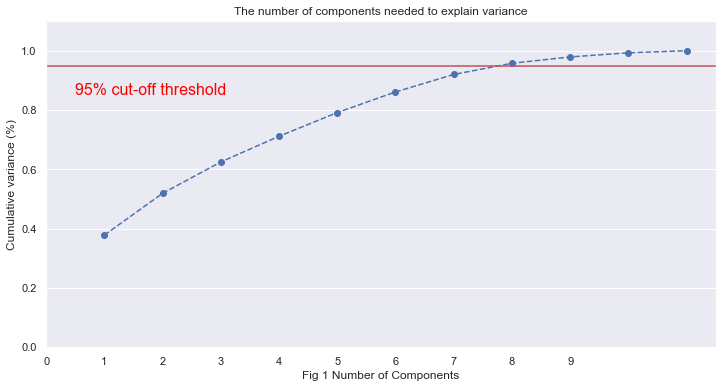

In [72]:
scaler=StandardScaler()
scaler.fit(df[features_list])
scaled_data=scaler.transform(df[features_list])

pca = PCA().fit(scaled_data)
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Fig 1 Number of Components')
plt.xticks(np.arange(0, 10, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

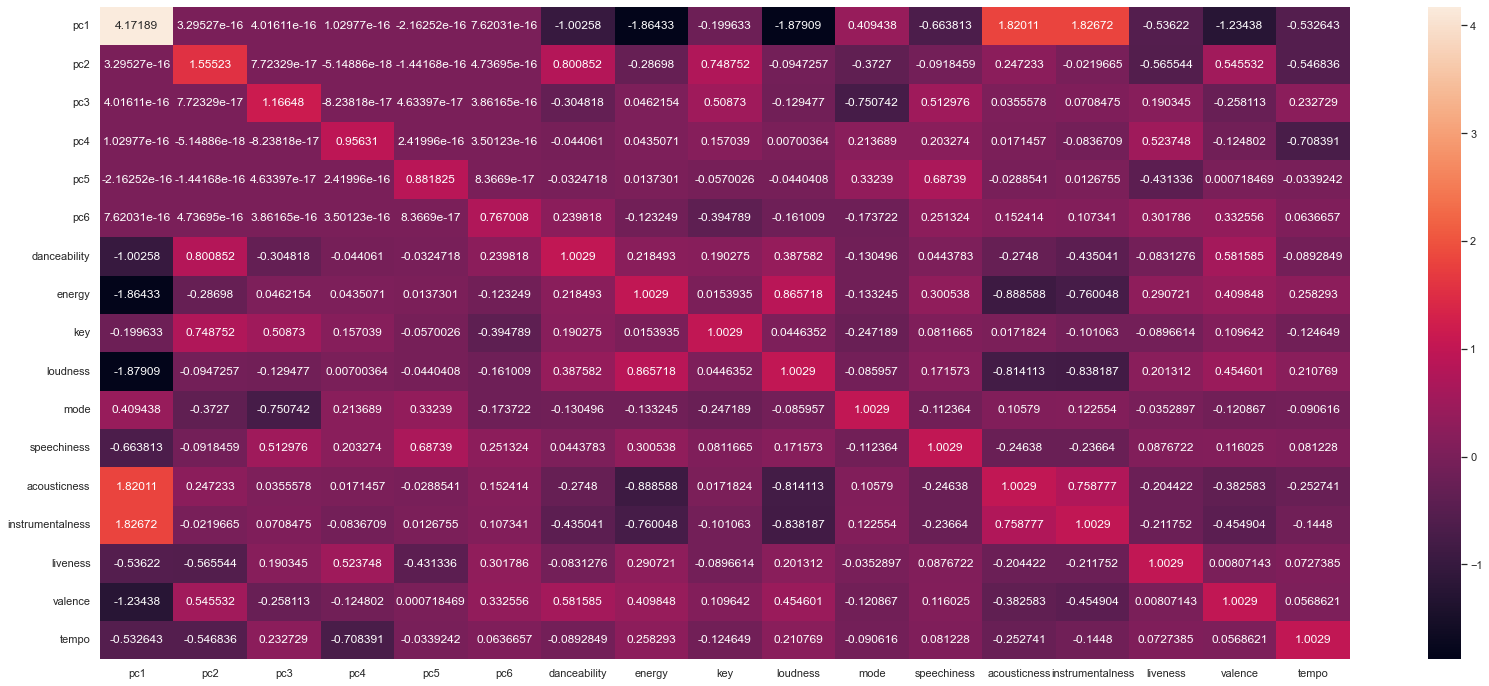

<Figure size 2016x1296 with 0 Axes>

In [73]:
x_pca=pca.transform(scaled_data)
df_scaled = pd.DataFrame(scaled_data, columns=features_list)
df_pc = pd.DataFrame(data = x_pca, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8', 'pc9',
                                             'pc10', 'pc11'])

df_pc=df_pc.drop(['pc7'],axis=1)
df_pc=df_pc.drop(['pc8'],axis=1)
df_pc=df_pc.drop(['pc9'],axis=1)
df_pc=df_pc.drop(['pc10'],axis=1)
df_pc=df_pc.drop(['pc11'],axis=1)

df_col = pd.concat([df_pc,df_scaled], axis=1)
df_col
covMatrix = pd.DataFrame.cov(df_col)
sn.set(rc={'figure.figsize':(28,12)})
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.figure(figsize=(28,18))
plt.show()